<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE04LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [3]:
# add a bias term -1 into the data set.
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

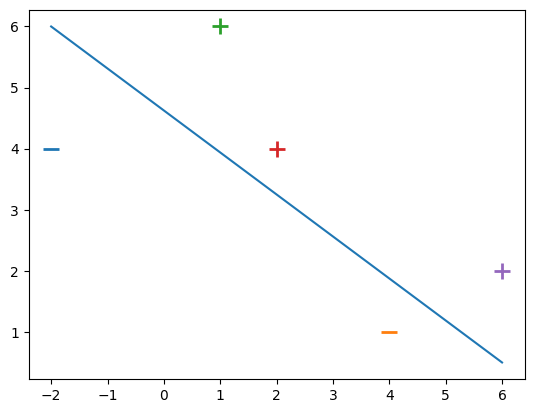

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

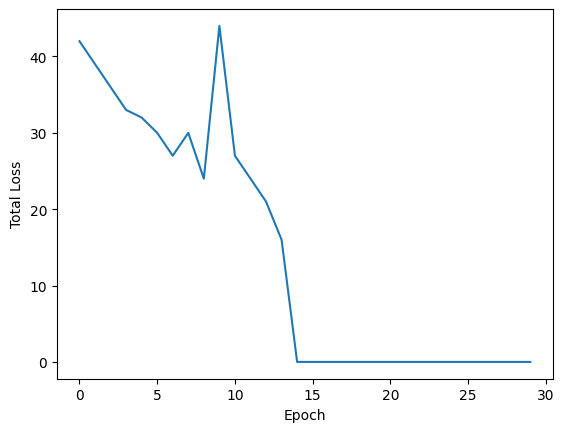

In [8]:
w = perceptron_algo_plot(X, y)

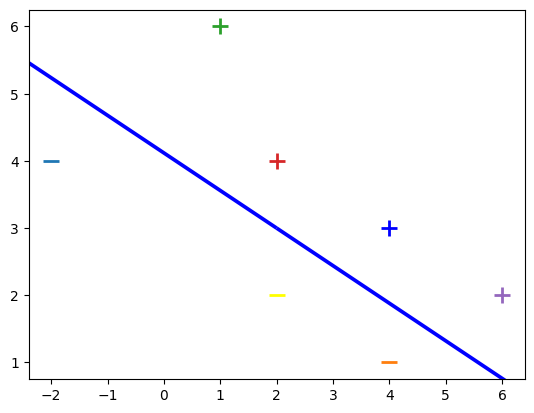

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

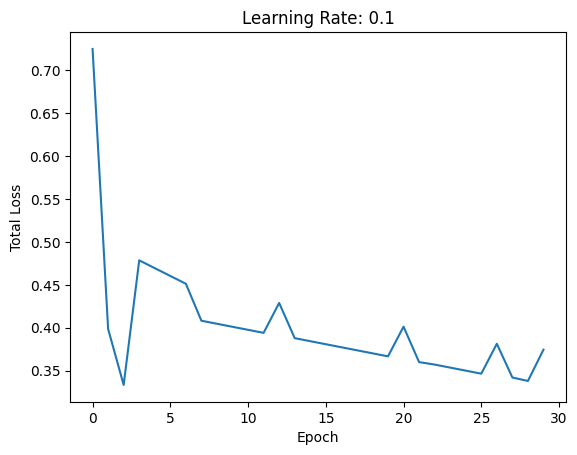

Weights for learning rate 0.1: [-0.23291625  0.57511977]


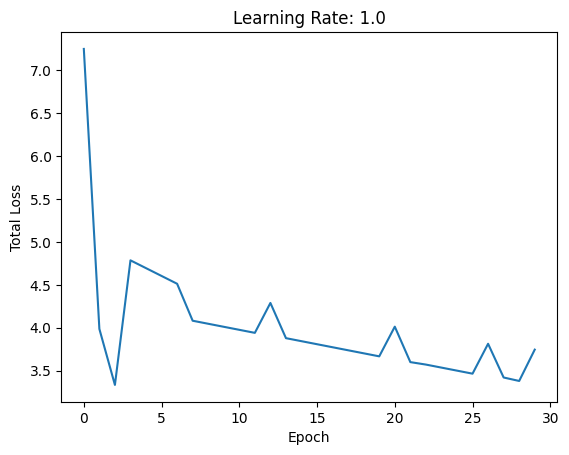

Weights for learning rate 1.0: [-2.32916253  5.75119768]


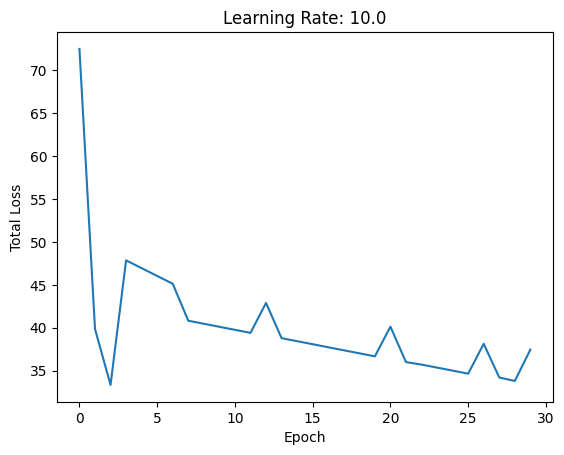

Weights for learning rate 10.0: [-23.29162529  57.51197681]


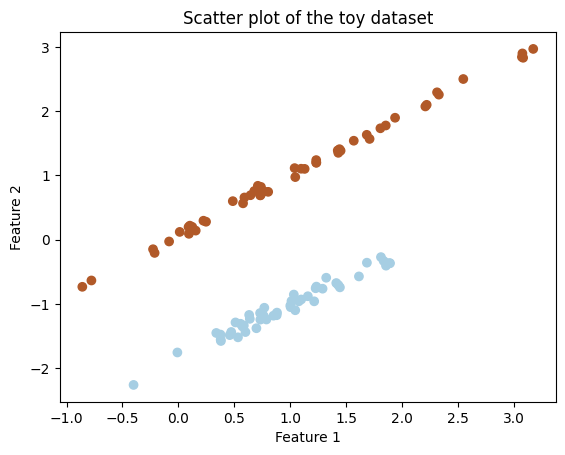

In [10]:
#try this
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generating a toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Define perceptron algorithm
def perceptron_algo(X, Y, learning_rate=1.0, epochs=30):
    w = np.zeros(len(X[0]))
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {learning_rate}')
    plt.show()

    return w

# Applying perceptron algorithm with different learning rates
learning_rates = [0.1, 1.0, 10.0]

for lr in learning_rates:
    w = perceptron_algo(X, y, learning_rate=lr)
    print(f'Weights for learning rate {lr}: {w}')

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the toy dataset')
plt.show()


in the above code==generate a toy dataset using scikit-learn, apply the perceptron algorithm with different learning rates, and plots the total loss over epochs for each learning rate. It also visualizes the decision boundary in the feature space.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


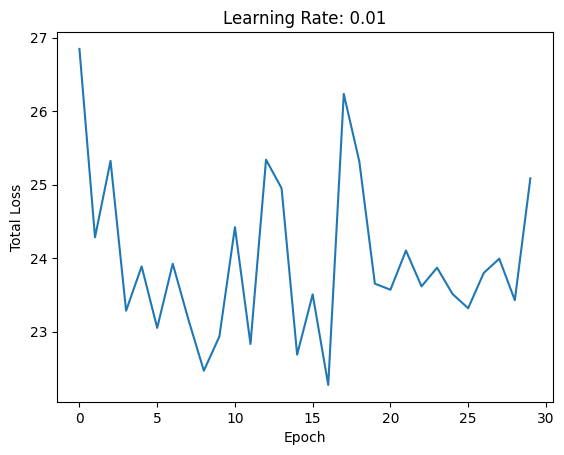

Weights for learning rate 0.01: [ 0.02930126  0.04144001  0.12319546 -0.18158894]


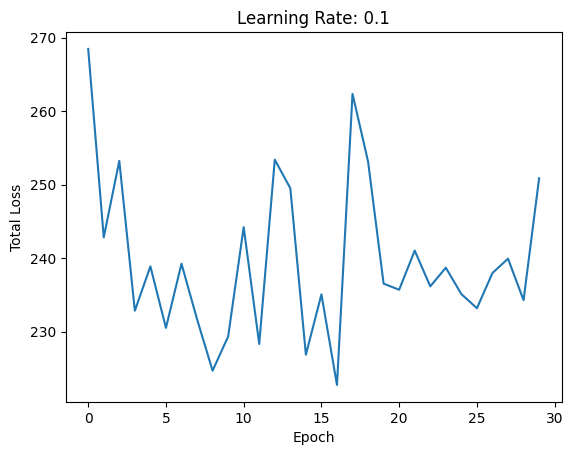

Weights for learning rate 0.1: [ 0.2930126  0.4144001  1.2319546 -1.8158894]


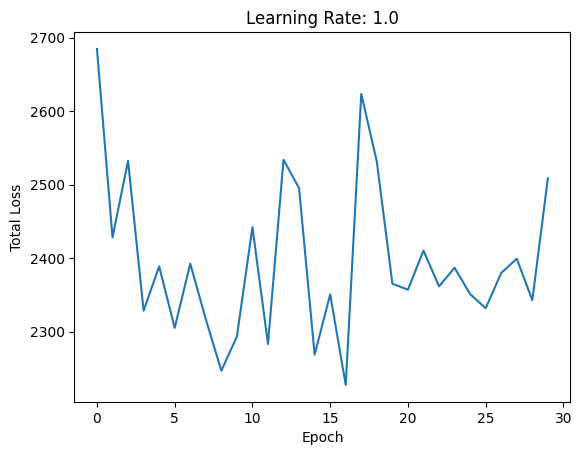

Weights for learning rate 1.0: [  2.930126   4.144001  12.319546 -18.158894]


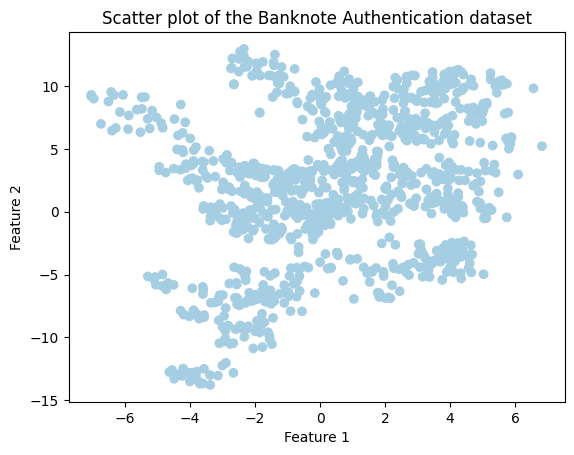

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Banknote Authentication dataset
banknote = fetch_openml(name="banknote-authentication", version=1)
X = np.array(banknote.data)
y = np.array(banknote.target)

# Convert labels to binary (-1 and 1)
y = np.where(y == '0', -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define perceptron algorithm
def perceptron_algo(X, Y, learning_rate=1.0, epochs=30):
    w = np.zeros(len(X[0]))
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {learning_rate}')
    plt.show()

    return w

# Apply perceptron algorithm with different learning rates
learning_rates = [0.01, 0.1, 1.0]

for lr in learning_rates:
    w = perceptron_algo(X_train, y_train, learning_rate=lr)
    print(f'Weights for learning rate {lr}: {w}')

# Evaluate on the test set (you may want to implement accuracy evaluation here)

# Visualize the decision boundary (2D projection of the dataset)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the Banknote Authentication dataset')
plt.show()


In the above code:

We load the Banknote Authentication dataset using scikit-learn.
Convert labels to binary (-1 and 1) for the perceptron algorithm.
Split the dataset into training and testing sets.
Apply the perceptron algorithm with different learning rates and plot the error over epochs for each learning rate.
Visualize the decision boundary in a 2D projection of the dataset.

**Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

Higher learning rates might lead to faster convergence, but extremely high learning rates can cause overshooting and prevent convergence.
In the case of a non-linearly separable dataset, the perceptron algorithm might not converge. You'll observe the total loss not reaching zero, indicating that the algorithm couldn't find a hyperplane to separate the classes.